In [1]:
import time

import numpy as np
import torch


In [2]:
# 100 * 110kk
# N*logN - 110KK * 8

In [3]:
def get_top_k_torch(arr: np.array, k: int = 1000):
    t = torch.Tensor(arr)
    return torch.topk(t, k)[0]

In [4]:
def get_top_k_sort(arr: np.array, k: int = 1000):
    return np.sort(arr)[::-1][:k]

In [5]:
def get_top_k_partition(arr: np.array, k: int = 1000):
    return np.sort(arr[np.argpartition(arr, kth=k)[:k]])

In [6]:
size = 10**6
array = np.random.randint(0, size, size)

In [7]:
%%timeit
get_top_k_sort(array, 1000)

52.7 ms ± 434 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
%%timeit
get_top_k_torch(array, 1000)

2.58 ms ± 35.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
# Более чем в 10 раз быстрее! Это значит, что мы сможем доставлять рекомендации до пользователей не за сутки, а за пару часов!

In [10]:
def benchmark(arrays, fn):
    times = []
    for arr in arrays:
        size_times = []
        for _ in range(1):
            start = time.time()
            fn(arr)
            size_times.append((time.time() - start))
        times.append(np.mean(size_times))
    return times
        
        
    


In [11]:
arr_sizes = [2 ** (10 + i) for i in range(18)]

In [12]:
arr_sizes[-1]

134217728

In [13]:
arrays = [np.random.uniform(0, size, size) for size in arr_sizes]

In [14]:
sort_times = benchmark(arrays, get_top_k_sort)

In [15]:
torch_times = benchmark(arrays, get_top_k_torch)

In [16]:
part_times = benchmark(arrays, get_top_k_partition)

In [17]:
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'  
from matplotlib import pyplot as plt  
import seaborn as sns  
sns.set()

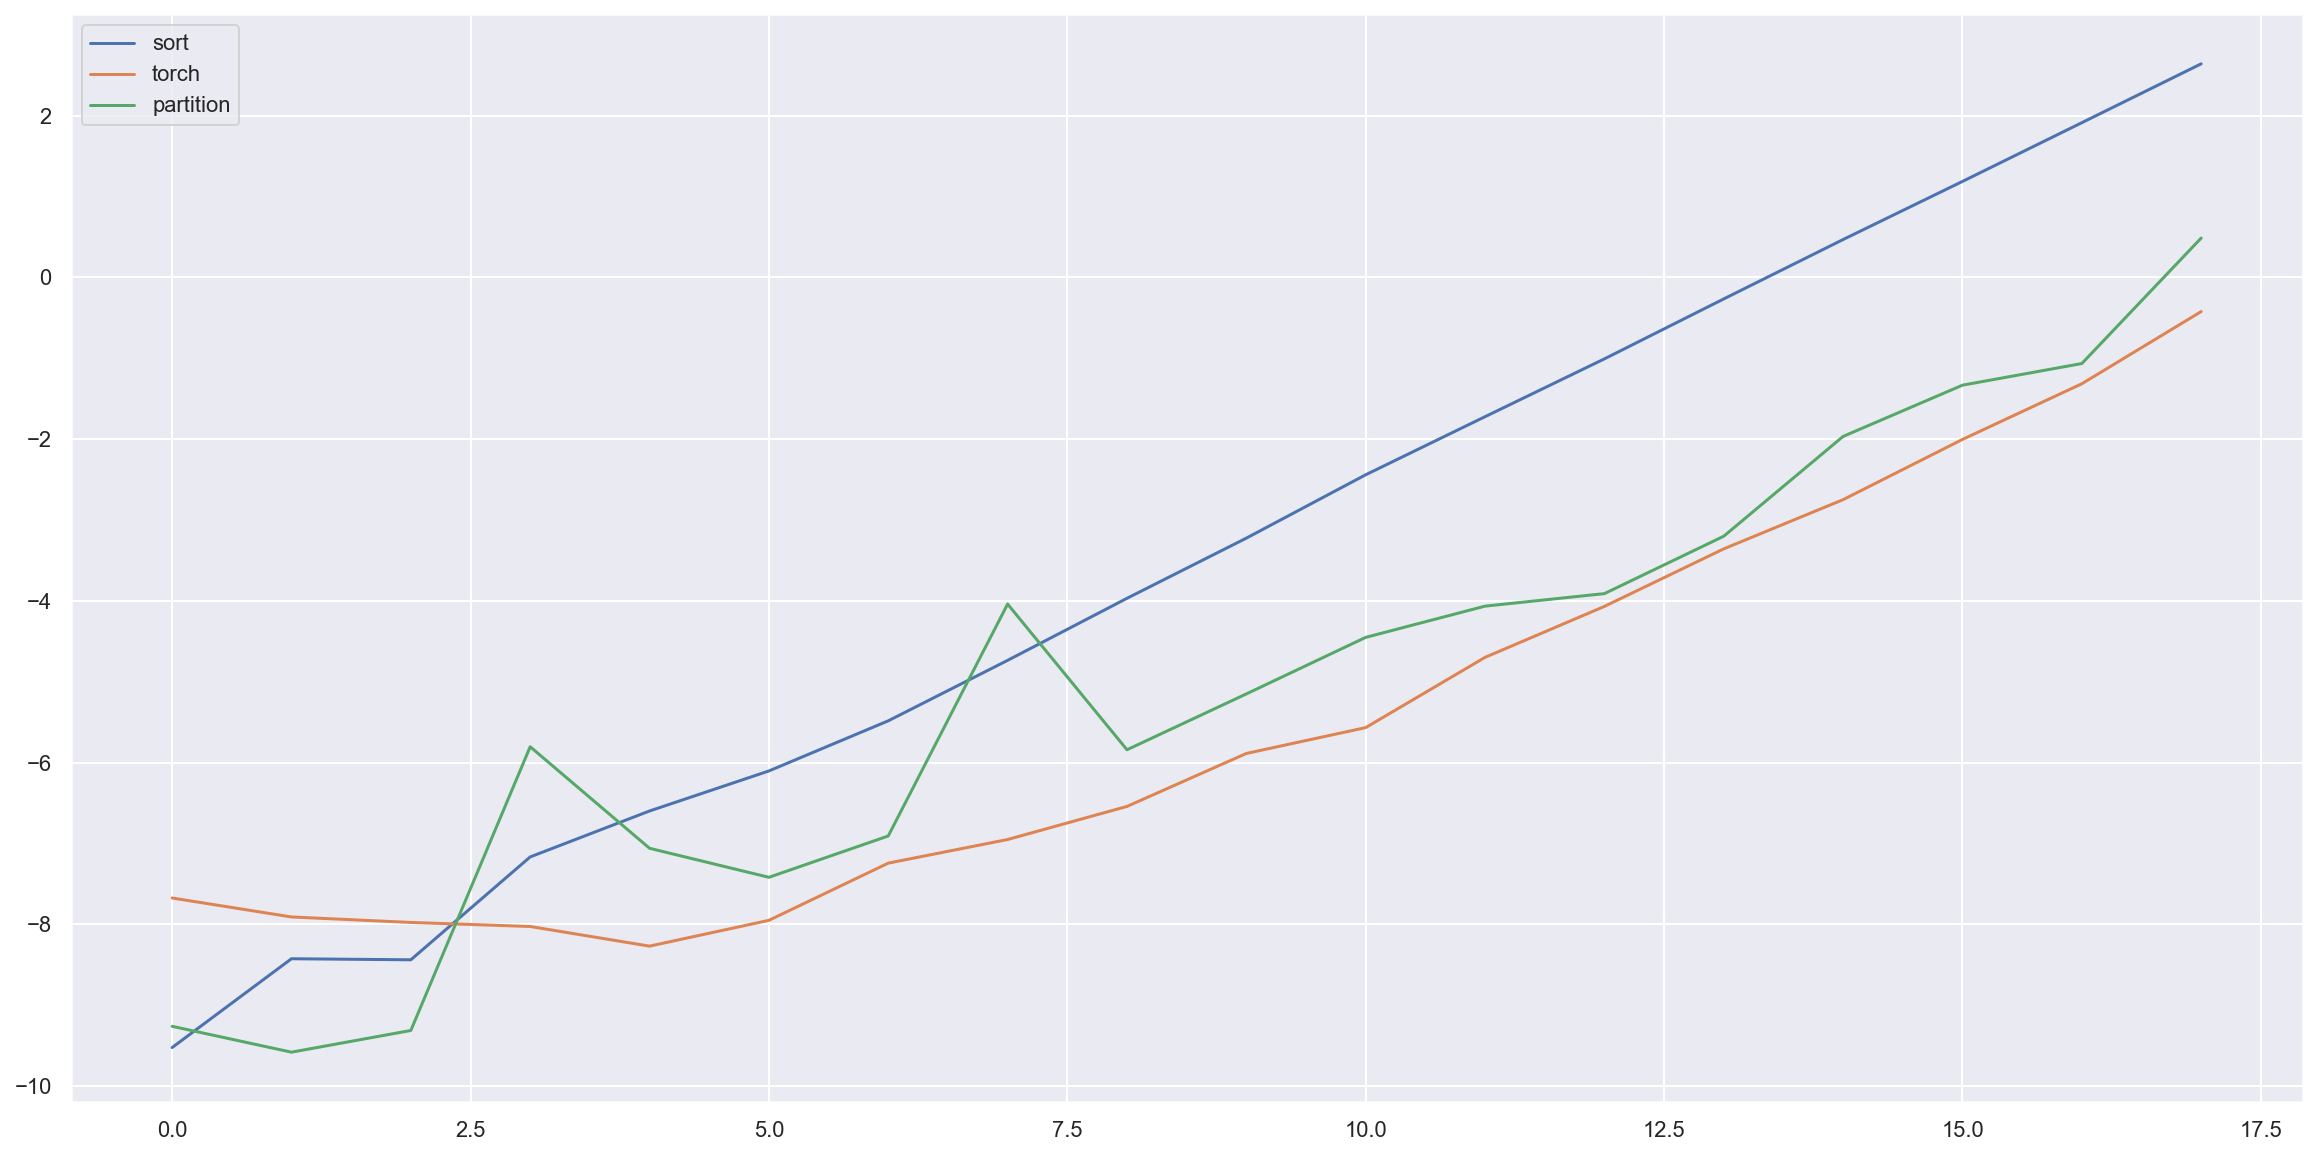

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(np.log(sort_times), label='sort')
plt.plot(np.log(torch_times), label='torch')
plt.plot(np.log(part_times), label='partition')
plt.legend()
